In [8]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import plots

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

In [9]:
# plots.compare(3,["u_wzp6","u_kkmc","u_wz3p8"], "RP_no", "final_comp_RP_no", "Number of Reconstructed Particles", legend_loc = "lower center", ratio_lim = [0.5,1.5], save = False)



In [10]:
# plots.plot(5,["mu","e","tau","gaga","u_kkmc"], "RP_no", "final_plot_RP_no", "Number of Reconstructed Particles", save = False)



In [11]:
# plots.compare(3,["u_wzp6","u_kkmc","u_wz3p8"], "norm_energy_vis", "final_comp_norm_energy", r"$E_{vis}$ / $ \sqrt{s}$", legend_loc = "lower center", ratio_lim = [0.5,1.5], save = True)



In [12]:
# plots.compare(3,["u_wzp6","u_kkmc","u_wz3p8"], "n_charged", "final_comp_RP_charged", "Charged Multiplicity", legend_loc = "lower center", ratio_lim = [0.5,1.5], save = True)



In [13]:
# plots.compare(3,["u_wzp6","u_kkmc","u_wz3p8"], "norm_RP_e_vis", "final_comp_RP_e", r"$E_{particle}$ / $ \sqrt{s}$", legend_loc = "lower center", ratio_lim = [0.5,1.5], lim = [0,0.52], ylabel_name = "Particles", save = True)



Text(0.0, 1.0, 'FCC-ee simulation')

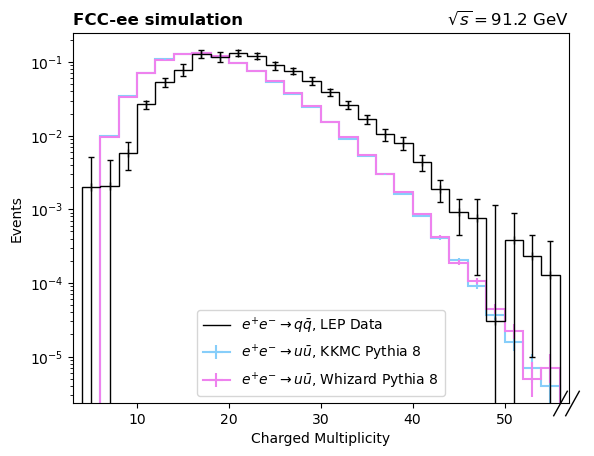

In [14]:
LEP_values = np.array([0.002,0.0021,0.0058,0.0266,0.0531,0.079,0.128,0.118,0.133,0.122,0.09,0.076,0.0559,0.0389,0.0264,0.0166,0.0105,0.008,0.0044,0.0019,0.00091,0.00076,0.00003,0.00038,0.00023,0.00013])
errors = np.array([0.0032,0.0026,0.0024,0.0033,0.0071,0.014,0.016,0.019,0.013,0.011,0.011,0.0069,0.007,0.0039,0.0032,0.0022,0.002,0.0016,0.0011,0.00064,0.00046,0.00063,0.0011,0.0005,0.00022,0.00024])
lep = Hist(hist.axis.Regular(26, 4, 56, name = "x"))
xs = [4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56]
xs2 = [5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55]
lep.fill(xs[:-1], weight=LEP_values)

kkmc = f["kkmc_ee_uu_ecm91p2/n_charged"].to_hist()[4j:56j]
wzp = f["wz3p8_ee_uu_ecm91p2/n_charged"].to_hist()[4j:56j]

hep.histplot([kkmc,wzp], label = [r"$e^{+} e^{-} \rightarrow u \bar{u}$, KKMC Pythia 8", r"$e^{+} e^{-} \rightarrow u \bar{u}$, Whizard Pythia 8"], 
             stack = False, color = ["lightskyblue", "violet"])
plt.stairs(LEP_values,xs, color = "black", label = r"$e^{+} e^{-} \rightarrow q \bar{q}$, LEP Data")
plt.errorbar(x = xs2, y = LEP_values, fmt = "|", yerr = errors,linewidth=1, capsize=2, color = "black", ds ="steps")
plt.xlabel("Charged Multiplicity")
plt.xlim(3,57)
plt.legend()
plt.ylabel("Events")
plt.yscale("log")
plt.title(r"$\sqrt{s} = 91.2 $ GeV", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/lep_comp.png")